In [251]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
cust_acq=pd.read_csv('D:/sampledata/Credit Card Case Study/Customer Acqusition.csv')
cust_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [253]:
cust_acq.shape

(100, 8)

In [254]:
cust_acq.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [255]:
cust_acq.duplicated().sum()

0

In [256]:
rep=pd.read_csv('D:/sampledata/Credit Card Case Study/Repayment.csv')

In [257]:
rep.shape

(1500, 4)

In [258]:
rep.isna().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [259]:
rep.duplicated().sum()

0

In [260]:
spend=pd.read_csv('D:/sampledata/Credit Card Case Study/Spend.csv')

In [261]:
spend.shape

(1500, 5)

In [262]:
spend.duplicated().sum()

0

In [263]:
spend.isna().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [264]:
cust_acq.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [265]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [266]:
rep.head(2)

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,3-Jan-04,245899.02


In [267]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [268]:
sp_re=pd.merge(left=rep,right=spend,on='Customer')

In [269]:
sp_re.shape

(37284, 8)

In [270]:
sp_re.isna().sum()

SL No:      0
Customer    0
Month_x     0
Amount_x    0
Sl No:      0
Month_y     0
Type        0
Amount_y    0
dtype: int64

In [271]:
pd.merge(left=sp_re,right=cust_acq,on='Customer')

,SL No:,Customer,Month_x,Amount_x,Sl No:,Month_y,Type,Amount_y,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,495414.75,1,12-Jan-04,JEWELLERY,485470.80,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,1,A1,12-Jan-04,495414.75,2,3-Jan-04,PETRO,410556.13,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,1,A1,12-Jan-04,495414.75,3,15-Jan-04,CLOTHES,23740.46,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,1,A1,12-Jan-04,495414.75,4,25-Jan-04,FOOD,484342.47,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,1,A1,12-Jan-04,495414.75,5,17-Jan-05,CAMERA,369694.07,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,349,A7,3-Jan-04,473662.61,277,3-May-06,AIR TICKET,305050.62,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
37280,349,A7,3-Jan-04,473662.61,295,23-Feb-05,CAMERA,314704.54,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
37281,349,A7,3-Jan-04,473662.61,313,12-Jan-04,AUTO,498358.28,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
37282,349,A7,3-Jan-04,473662.61,331,25-Jan-04,TRAIN TICKET,461282.47,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC


## Q1 In the above dataset :   

### a. In case age is less than 18, replace it with mean of age values.

In [272]:
cust_acq[cust_acq.Age<18]=cust_acq.Age.mean()

In [273]:
(cust_acq.Age<18).sum()

0

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [274]:
c_s=pd.merge(left = cust_acq,
               right = spend,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner',
               indicator = True) 
c_s

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,both
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,both
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,both
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,96.0,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,both
1426,97.0,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,both
1427,98.0,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,both
1428,99.0,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,both


In [275]:
c_s.loc[c_s.Amount>c_s.Limit]=Cust_limit

ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
Cust_limit = 0.50*c_s.Limit
c_s.loc[c_s['Amount']>c_s['Limit'],['Amount','Limit']] = Cust_limit
c_s

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit. 

In [ ]:
c_r=pd.merge(left = cust_acq,
               right = rep,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner',
               indicator = True) 
c_r

In [ ]:
c_r.loc[c_r['Amount']>c_r['Limit'],['Amount','Limit']]=0.50*c_r.Limit
c_r

## Q2. From the above dataset create the following summaries:


### a. How many distinct customers exist?

In [ ]:
cust_acq.Customer.nunique()

### b. How many distinct categories exist?

In [ ]:
cust_acq.Product.drop_duplicates()

### c. What is the average monthly spend by customers?

In [ ]:
spend['Month']=pd.to_datetime(spend['Month'])

In [ ]:
spend.dtypes

In [ ]:
spend.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [ ]:
spend['month']=spend['Month'].apply(lambda x:x.month)

In [ ]:
AvgMonthlySpend=spend.groupby(['Customer','month']).Amount.mean().reset_index()

### d. What is the average monthly repayment by customers?

In [ ]:
rep

In [ ]:
rep['Month']=pd.to_datetime(rep['Month'])

In [ ]:
rep['month']=rep['Month'].apply(lambda x:x.month)

In [ ]:
AvgMonthlyRepay=rep.groupby(['Customer','month']).Amount.mean().reset_index()
AvgMonthlyRepay

In [ ]:
AvgMonthlySpend

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [ ]:
AvgMonthlyCustomer=pd.merge(left=AvgMonthlySpend,right=AvgMonthlyRepay,left_on=['Customer','month'],right_on=['Customer','month'])

In [ ]:
AvgMonthlyCustomer['profit']=AvgMonthlyCustomer.Amount_y-AvgMonthlyCustomer.Amount_x

In [ ]:
AvgMonthlyCustomer['profit']=np.where(AvgMonthlyCustomer['profit']>0,AvgMonthlyCustomer['profit']*2.9/100,np.nan)

In [ ]:
AvgMonthlyCustomer.head(5)

### f. What are the top 5 product types?

In [ ]:
c_s.groupby(['Type']).Amount.sum().reset_index().sort_values(by='Amount',ascending=False)

### g. Which city is having maximum spend?

In [ ]:
c_s.groupby('City').Amount.sum().reset_index().sort_values(by='Amount',ascending=False)

### h. Which age group is spending more money?

In [ ]:

c_s['Age_Group']=np.where(((c_s.Age.astype(int) >= 18) & (c_s.Age.astype(int) < 25)), 'Youth',np.where(((c_s.Age.astype(int) >= 25) & (c_s.Age.astype(int) < 65)), 'Adult','Senior'))

In [ ]:
c_s

In [ ]:
c_s.groupby('Age_Group').Amount.sum()

### i. Who are the top 10 customers in terms of repayment?

In [ ]:
c_r.groupby('Customer').Amount.sum().reset_index().sort_values(by='Amount',ascending=False).head(10)

## Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [ ]:
c_s.dtypes

In [287]:
c_s['Month']=pd.to_datetime(c_s['Month'])

In [288]:
c_s['year']=c_s['Month'].apply(lambda x:x.year)

In [289]:
city_wise_data=pd.pivot_table(data=c_s,index='City',columns=['Product','year'],values='Amount',aggfunc='sum')

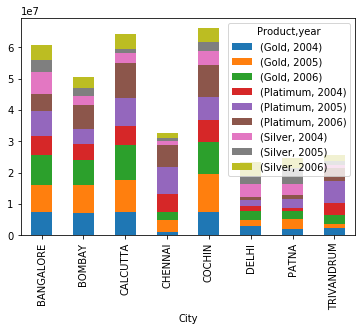

In [290]:
city_wise_data.plot(kind='bar',stacked=True)
plt.show()

## Q4. Create graphs for -

### a. Monthly comparison of total spends, city wise

In [291]:
c_s['month']=c_s['Month'].apply(lambda x:x.month)

In [292]:
c_s.head(6)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge,year,month
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,both,2004,1
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,both,2004,1
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,both,2004,1
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,both,2004,1
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,both,2005,1
5,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6,2005-02-23,SANDALS,168285.60,both,2005,2


In [297]:
month_wise_data=pd.pivot_table(data=c_s,index='City',columns='month',values='Amount',aggfunc='sum')

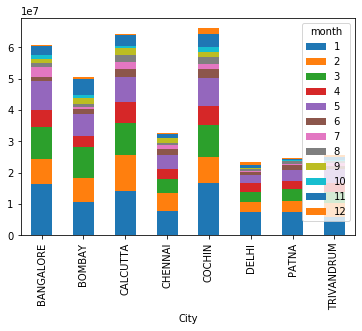

In [300]:
month_wise_data.plot(kind='bar',stacked=True)
plt.show()

### b. Comparison of yearly spend on air tickets

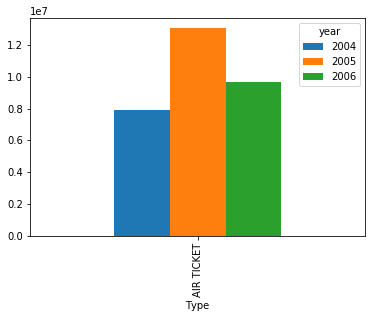

In [306]:
pd.pivot_table(data=c_s[c_s.Type=='AIR TICKET'],index='Type',columns='year',values='Amount',aggfunc='sum').plot(kind='bar')

### c. Comparison of monthly spend for each product

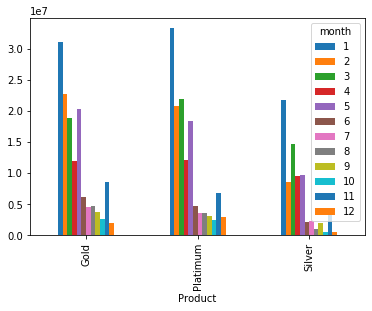

In [309]:
pd.pivot_table(data=c_s,index='Product',columns='month',values='Amount',aggfunc='sum').plot(kind='bar')

## Q5.Write user defined PYTHON function to perform the following analysis:

In [360]:
c_r

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,_merge
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75,both
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,245899.02,both
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06,both
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12,both
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88,both
...,...,...,...,...,...,...,...,...,...,...,...,...
1425,96.0,A96,54.0,CHENNAI,Silver,50000.0,C19,Salaried_Pvt,98,25-Jan-04,50000.00,both
1426,97.0,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,12-Jan-04,5000.00,both
1427,98.0,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,3-Jan-04,5000.50,both
1428,99.0,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,15-Jan-04,5001.00,both


In [349]:
rep['Month']=pd.to_datetime(rep['Month'])

In [350]:
rep['yearly']= rep['Month'].apply(lambda x:x.year)

In [351]:
rep['monthly']= rep['Month'].apply(lambda x:x.month)

In [361]:
def top10Customers(product_category,time_period):
    return c_r.loc[(c_r.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [362]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: 
Please Enter Time Period and time period should be in yearly/monthly: 


In [363]:
top10Customers_Analysis=top10Customers(product_category,time_period)

KeyError: ''

In [364]:
top10Customers_Analysis

NameError: name 'top10Customers_Analysis' is not defined